In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Queueing simulation
## Exponential random draws

In [2]:
def exponential_rng(lam=1.0):  
    """ Generates exponential random number.
    
    Keywords:
        lam (float): the rate parameter, the inverse expectation of the distribution.
    
    Returns:
        exponential random number with given rate.
    """
    return -np.log(np.random.rand()) / lam

## Define events

In [3]:
class Event:
    def __init__(self, event_type, time):
        self.time = time
        type_map = {
            0: "SIMULATION_START",
            1: "GENERATION",
            2: "ARRIVAL",
            3: "DEPARTURE",
            4: "SIMULATION_END",
        }
        if event_type in type_map:
            self.type = type_map[event_type]
        else:
            raise ValueError("Type must be an integer between 0 and 4")


## Define scenario

In [4]:
class Scenario:
    """ Road scenario
    
    Attributes:
        demand duration (float): Duration of vehicle generation.
        t0 (float): Free-flow travel time.
        lam (float): Entry rate.
        mu (float): Service rate.
    """
    
    def __init__(self, 
                 demand_duration=50.0,
                 t0=1.0,
                 lam=1.0,
                 mu=1.0,
                ):
        self.demand_duration = demand_duration
        self.t0 = t0
        self.lam = lam
        self.mu = mu

## Define simulation procedure

In [5]:
def simulate(scenario):
    current_time = 0
    queue = 0
    events = []
    times = []
    queues = []

    # Function to add events and keep the list sorted by event time
    def schedule_event(event):
        events.append(event)
        events.sort(key=lambda e: e.time)
    
    # Initialize with simulation start
    schedule_event(Event(0, current_time))
 
    while events:
        # Get the next event
        event = events.pop(0)
        current_time = event.time
        times.append(current_time)
        queues.append(queue)

        if event.type == "SIMULATION_START":
            # Schedule first generation event and simulation end
            schedule_event(Event(1, current_time))  ##Genaration
            schedule_event(Event(4, scenario.demand_duration)) ##SimEnd
        
        elif event.type == "GENERATION":
            # Generate a vehicle and schedule next generation if within demand duration
            if current_time <= scenario.demand_duration:
                schedule_event(Event(1, current_time+exponential_rng(scenario.lam) )) ##Next generation
                schedule_event(Event(2, current_time+ np.random.uniform(0,scenario.t0) )) ##Arrive
        
        elif event.type == "ARRIVAL":
            # Vehicle arrives at the queue
            queue += 1
            if queue == 1:  # If the queue was empty, schedule departure
                schedule_event(Event(3, current_time + exponential_rng(scenario.mu)))
        
        elif event.type == "DEPARTURE":
            # Vehicle leaves the queue
            queue -= 1
            if queue > 0:  # If there are more vehicles, schedule next departure
                schedule_event(Event(3,current_time + exponential_rng(scenario.mu)))
            else:
                times.append(current_time)
                queues.append(queue)
                
        # elif event.type == "SIMULATION_END":
        #     break  # End simulation

    return times, queues



## Run simulation

In [6]:
times, queues = simulate(Scenario())

## Repeat the simulation multiple times

In [280]:
D = 3
np.random.seed(2024)
times_queues = [simulate(Scenario()) for d in range(D)]

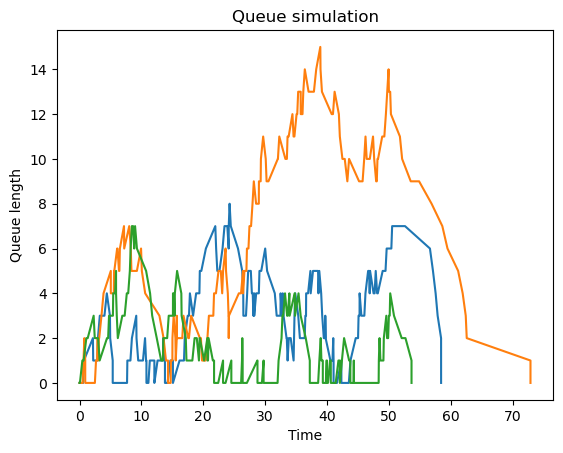

In [281]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

for t, q in times_queues:
    ax.plot(t, q)
ax.set(title='Queue simulation',
       xlabel='Time',
       ylabel='Queue length')
fig.savefig('figure_queue_simulation.pdf', dpi=300)
plt.show()